In [9]:
using DataFrames
using Gadfly

# Os imports das bibliotecas Cairo e Images permitem a publicação
# do notebook sem os erros em alguns gráficos do Gadfly
import Cairo
import Images

In [10]:
pop = readtable("../data/populationbycountry19802010millions.csv", nastrings=["","NA","--"])
pop

,Pais,x1980,x1981,x1982,x1983,x1984,x1985,x1986,x1987,x1988,x1989,x1990,x1991,x1992,x1993,x1994,x1995,x1996,x1997,x1998,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,x2009,x2010
1,North America,320.27638,324.44694,328.62014,332.72487,336.72143,340.74811,344.89548,349.07829,353.2939,357.68457,362.4468,367.70684,373.29069,378.74233,383.9166,388.97216,393.9428,398.97205,403.85585,408.60296,413.3245,417.83236,422.05268,426.06238,430.26938,434.47232,438.82964,443.3473,447.67394,451.83698,456.59331
2,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,0.05749,0.05778,0.0581,0.0587,0.05924,0.05975,0.06029,0.06087,0.06145,0.06198,0.06251,0.06306,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827
3,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,27.3793,27.7906,28.1179,28.54489,28.95334,29.33081,29.69053,30.02632,30.3056,30.55166,30.82026,31.09956,31.37674,31.64096,31.88931,32.13476,32.38638,32.65668,32.93596,33.2127,33.48721,33.75974
4,Greenland,0.05021,0.05103,0.05166,0.05211,0.05263,0.05315,0.05364,0.0541,0.05485,0.05541,0.05563,0.05554,0.05549,0.05564,0.05592,0.05619,0.05634,0.05651,0.05661,0.0567,0.05689,0.05713,0.05736,0.05754,0.0577,0.05778,0.05764,0.05753,0.05756,0.0576,0.05764
5,Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,83.36684,84.91365,86.48803,88.11103,89.74914,91.3379,92.88035,94.39858,95.89515,97.32506,98.61691,99.92662,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886
6,Saint Pierre and Miquelon,0.00599,0.00601,0.00605,0.00607,0.00611,0.00616,0.00621,0.00625,0.00628,0.00631,0.00632,0.00633,0.00636,0.00638,0.0064,0.0064,0.00641,0.00642,0.00642,0.00643,0.00641,0.00637,0.00633,0.00629,0.00625,0.0062,0.00615,0.0061,0.00605,0.006,0.00594
7,United States,227.22468,229.46571,231.66446,233.79199,235.8249,237.9238,240.13289,242.28892,244.49898,246.81923,249.62281,252.98094,256.51422,259.91859,263.12582,266.27839,269.39428,272.64693,275.8541,279.04017,282.17196,285.08156,287.80391,290.32642,293.04574,295.75315,298.59321,301.5799,304.37485,307.00655,310.23286
8,Central & South America,293.05856,299.43033,305.95253,312.51136,318.87955,325.22704,331.82291,338.59859,345.44544,352.20471,358.79973,365.15137,371.43224,377.7438,384.26984,390.75665,397.13002,403.41352,409.62879,415.63607,421.4539,427.24012,433.05116,438.97976,445.01525,451.05504,457.01699,462.89157,468.73872,474.53897,480.01228
9,Antarctica,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,Antigua and Barbuda,0.06855,0.06826,0.06801,0.06562,0.06447,0.0644,0.0644,0.06442,0.06443,0.06439,0.06416,0.06403,0.06518,0.06633,0.06749,0.06871,0.07006,0.07145,0.07278,0.07402,0.07535,0.07673,0.07794,0.07907,0.08019,0.08128,0.08234,0.08343,0.08452,0.08563,0.08675


### transposição dos dados

In [11]:
paises = DataFrame()
paises[:Ano] = 1980:2010
for pais in pop[:Pais]
    dados = convert(DataArray{Float64,2}, pop[pop[:Pais] .== pais,2:end]).'
    paises[symbol(pais)] = dados[:,1]
end
paises

,Ano,North America,Bermuda,Canada,Greenland,Mexico,Saint Pierre and Miquelon,United States,Central & South America,Antarctica,Antigua and Barbuda,Argentina,Aruba,"Bahamas, The",Barbados,Belize,Bolivia,Brazil,Cayman Islands,Chile,Colombia,Costa Rica,Cuba,Dominica,Dominican Republic,Ecuador,El Salvador,Falkland Islands (Islas Malvinas),French Guiana,Grenada,Guadeloupe,Guatemala,Guyana,Haiti,Honduras,Jamaica,Martinique,Montserrat,Netherlands Antilles,Nicaragua,Panama,Paraguay,Peru,Puerto Rico,Saint Kitts and Nevis,Saint Lucia,Saint Vincent/Grenadines,Suriname,Trinidad and Tobago,Turks and Caicos Islands,Uruguay,Venezuela,"Virgin Islands, U.S.","Virgin Islands, British",Europe,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Faroe Islands,Finland,Former Czechoslovakia,Former Serbia and Montenegro,Former Yugoslavia,France,Germany,"Germany, East","Germany, West",Gibraltar,Greece,Hungary,Iceland,Ireland,Italy,Luxembourg,Macedonia,Malta,Montenegro,Netherlands,Norway,Poland,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,Eurasia,Armenia,Azerbaijan,Belarus,Estonia,Former U.S.S.R.,Georgia,Kazakhstan,Kyrgyzstan,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan,Middle East,Bahrain,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Oman,Palestine,Qatar,Saudi Arabia,Syria,United Arab Emirates,Yemen,Africa,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Cape Verde,Central African Republic,Chad,Comoros,Congo (Brazzaville),Congo (Kinshasa),Cote dIvoire (IvoryCoast),Djibouti,Egypt,Equatorial Guinea,Eritrea,Ethiopia,Gabon,"Gambia, The",Ghana,Guinea,Guinea-Bissau,Kenya,Lesotho,Liberia,Libya,Madagascar,Malawi,Mali,Mauritania,Mauritius,Morocco,Mozambique,Namibia,Niger,Nigeria,Reunion,Rwanda,Saint Helena,Sao Tome and Principe,Senegal,Seychelles,Sierra Leone,Somalia,South Africa,Sudan,Swaziland,Tanzania,Togo,Tunisia,Uganda,Western Sahara,Zambia,Zimbabwe,Asia & Oceania,Afghanistan,American Samoa,Australia,Bangladesh,Bhutan,Brunei,Burma (Myanmar),Cambodia,China,Cook Islands,Fiji,French Polynesia,Guam,Hawaiian Trade Zone,Hong Kong,India,Indonesia,Japan,Kiribati,"Korea, North","Korea, South",Laos,Macau,Malaysia,Maldives,Mongolia,Nauru,Nepal,New Caledonia,New Zealand,Niue,Pakistan,Papua New Guinea,Philippines,Samoa,Singapore,Solomon Islands,Sri Lanka,Taiwan,Thailand,Timor-Leste (East Timor),Tonga,U.S. Pacific Islands,Vanuatu,Vietnam,Wake Island,World
1,1980,320.27638,0.05473,24.5933,0.05021,68.34748,0.00599,227.22468,293.05856,NA,0.06855,28.3698,NA,0.20976,0.25197,0.14442,5.4413,123.01963,0.01708,11.09372,26.63129,2.29912,9.65298,0.07389,5.69686,7.9205,4.57041,0.002,0.07,0.09016,0.337,6.64959,0.75935,5.5077,3.40247,2.2288,0.339,0.01177,0.23244,2.80565,1.95957,3.1716,17.2953,3.20965,0.04357,0.12248,0.09814,0.35408,1.09051,0.00747,2.93049,14.76789,0.09964,0.011,529.50082,2.67141,7.54943,9.8468,NA,8.84353,NA,0.63027,NA,5.12303,0.04345,4.77954,15.25468,NA,21.76903,53.98766,NA,16.7579,61.54,0.02883,9.64251,10.71112,0.22816,3.401,56.47271,0.3644,NA,0.364,NA,14.1439,4.08562,35.57802,9.7778,22.13004,NA,NA,NA,37.48836,8.31047,6.4103,45.04797,56.51888,265.92182,NA,NA,NA,NA,265.92182,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,93.78699,0.34757,39.70873,13.23284,3.73747,2.16278,1.36977,2.8987,1.18548,NA,0.2369,10.02152,8.75241,1.00029,9.13255,478.96479,18.80606,6.74308,3.45806,0.90048,6.31819,4.29821,8.76249,0.29645,2.34878,4.52239,0.33351,1.67429,29.01255,8.59326,0.32687,42.63422,0.25601,NA,38.6052,0.71383,0.67052,11.01119,4.44737,0.7889,16.33054,1.35857,1.8571,3.06862,8.69125,6.25893,6.82161,1.54491,0.9637,19.48727,12.10262,NA,6.09347,74.82127,0.51,5.13984,0.00647,0.09407,5.61133,0.06395,3.33503,5.79356,30.30961,19.48245,0.61146,18.66506,2.62551,6.44318,12.41472,0.12404,5.64278,7.16997,2469.81743,15.0436,0.03242,14.6159,87.93733,0.44604,0.18522,33.33642,6.88852,984.73646,0.01801,0.63451,0.1509,0.10687,NA,5.0631,684.8877,151.0244,116.80731,0.05754,17.11363,38.124,3.293

In [12]:
paises = DataFrame()
paises[:Ano] = 1980:2010
by(pop, :Pais) do df
    paises[symbol(df[:Pais][1])] = convert(DataArray{Float64,2}, df[1,2:end]).'[:,1]
end
paises[:,[:Ano,:Brazil]]

,Ano,Brazil
1,1980,123.01963
2,1981,125.99213
3,1982,129.02765
4,1983,131.96012
5,1984,134.69947
6,1985,137.38198
7,1986,140.19628
8,1987,143.02654
9,1988,145.87275
10,1989,148.65864


#### Os comandos draw e display permitem a publicação do notebook
#### no GitHub sem que ocorram erros em alguns dos gráficos gerados.

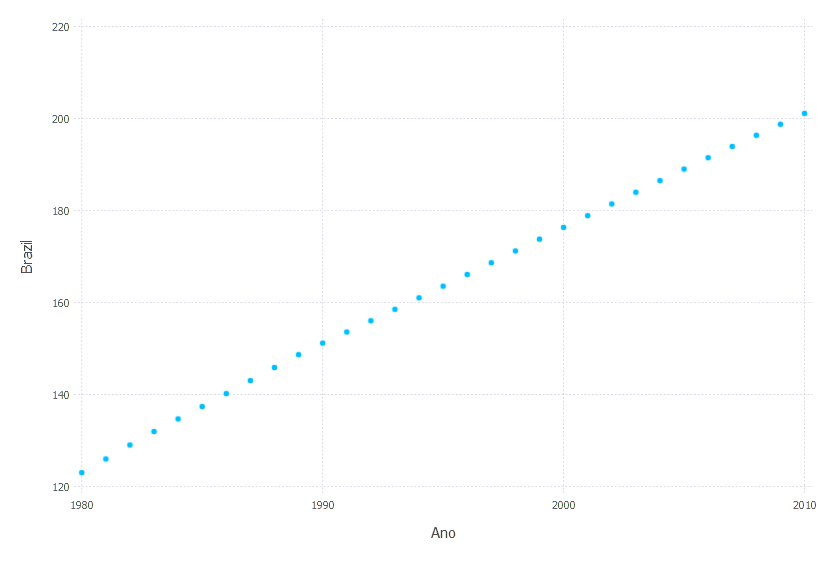

In [20]:
set_default_plot_size(22cm, 15cm)
p=plot(paises, x=:Ano, y=:Brazil)
draw(PNG("max_speeds.png", 22cm, 15cm), p)
display("image/png", p)

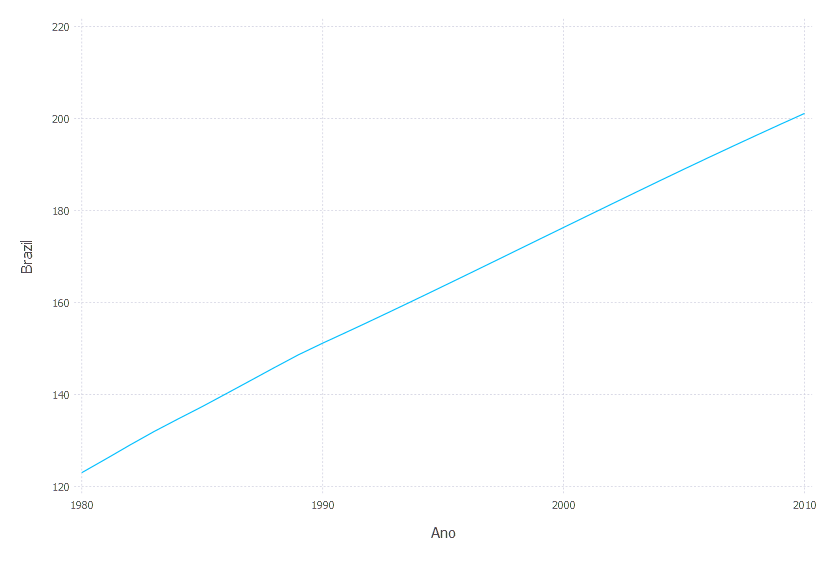

In [21]:
p=plot(paises, x=:Ano, y=:Brazil, Geom.line)
draw(PNG("max_speeds.png", 22cm, 15cm), p)
display("image/png", p)

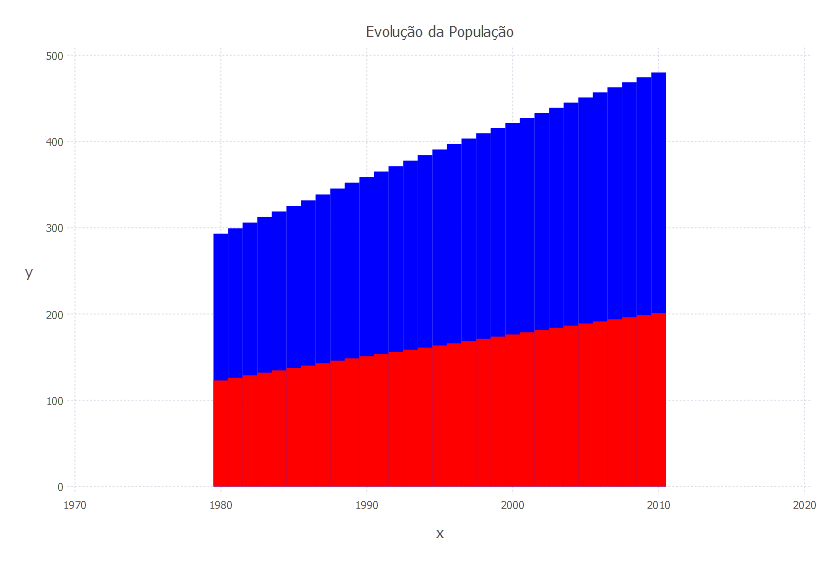

In [22]:
p=plot(
layer(x=paises[:Ano], y=paises[symbol("Central & South America")], Theme(default_color=colorant"blue"), Geom.bar, order=1),
layer(x=paises[:Ano], y=paises[symbol("Brazil")], Theme(default_color=colorant"red"), Geom.bar, order=2),
Guide.Title("Evolução da População"))
draw(PNG("max_speeds.png", 22cm, 15cm), p)
display("image/png", p)

Referências:

Os dados utilizados na confecção deste notebook foram obtidos a partir do site:

http://catalog.data.gov/dataset/population-by-country-1980-2010-d0250

O acesso ao site foi feito no dia 04/11/2015 e a licença para uso dos dados, conforme o site no momento do acesso, é a licença:

Public: This dataset is intended for public access and use. License: Creative Commons CCZero